# Coding Section

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [38]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = "/content/drive/MyDrive/GNCIPL_Internship_Projects/Finance/Data/Bank_Transaction.csv"
data = pd.read_csv(path)

Mounted at /content/drive


In [40]:
# Creating a copy of the dataset
df = data.copy()

# 1. **Overall Structure of the Dataset**


In [42]:
# ---- Step 1: Basic Characteristics ----
print("\n" + "="*50)
print("## Step 1: Basic Characteristics of the Data")
print("="*50 + "\n")

# Dataset shape
print(f"🔹 Shape of dataset: {df.shape} ")
print(f"🔹 Number of observations: {df.shape[0]}")
print(f"🔹 Number of variables: {df.shape[1]}")
print("\n" + "-"*50)


# Data types
print("🔹 Data Types:\n")
print(df.dtypes.to_string())
print("="*50 + "\n")



## Step 1: Basic Characteristics of the Data

🔹 Shape of dataset: (200000, 24) 
🔹 Number of observations: 200000
🔹 Number of variables: 24

--------------------------------------------------
🔹 Data Types:

Customer_ID                 object
Customer_Name               object
Gender                      object
Age                          int64
State                       object
City                        object
Bank_Branch                 object
Account_Type                object
Transaction_ID              object
Transaction_Date            object
Transaction_Time            object
Transaction_Amount         float64
Merchant_ID                 object
Transaction_Type            object
Merchant_Category           object
Account_Balance            float64
Transaction_Device          object
Transaction_Location        object
Device_Type                 object
Is_Fraud                     int64
Transaction_Currency        object
Customer_Contact            object
Transaction_Description

In [44]:
# ---- Step 2: Overall Structure ----
print("\n" + "="*50)
print("## Step 2: Overall Structure of the Dataset")
print("="*50 + "\n")

# Missing values
missing = df.isnull().sum()
print(f"🔹 Total Missing Values: {missing.sum()}\n")

# Target variable distribution
print("🔹 Target Variable: Class Distribution")
print(df['Is_Fraud'].value_counts().to_string())
print("\nPercentage Distribution:")
print((df['Is_Fraud'].value_counts(normalize=True) * 100).round(3).to_string())
print("\n" + "-"*50)


## Step 2: Overall Structure of the Dataset

🔹 Total Missing Values: 0

🔹 Target Variable: Class Distribution
Is_Fraud
0    189912
1     10088

Percentage Distribution:
Is_Fraud
0    94.956
1     5.044

--------------------------------------------------


In [46]:
# Separate categorical vs numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(exclude=['object']).columns

print("🔹 Column Types\n")
print("Categorical Columns:")
for col in categorical_cols:
    print(f"  - {col}", end="")
print("\nNumerical Columns:")
for col in numerical_cols:
    print(f"   - {col}", end="")
print("\n","="*50 + "\n")

🔹 Column Types

Categorical Columns:
  - Customer_ID  - Customer_Name  - Gender  - State  - City  - Bank_Branch  - Account_Type  - Transaction_ID  - Transaction_Date  - Transaction_Time  - Merchant_ID  - Transaction_Type  - Merchant_Category  - Transaction_Device  - Transaction_Location  - Device_Type  - Transaction_Currency  - Customer_Contact  - Transaction_Description  - Customer_Email
Numerical Columns:
   - Age   - Transaction_Amount   - Account_Balance   - Is_Fraud



In [47]:
#Displaying Data
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


# 2. **Statistical Analysis**

In [54]:
# For Fraud Data
df[df['Is_Fraud']==1].describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,10088.000000,10088.000000,10088.000000,10088.0
mean,43.914453,49277.925242,52452.891412,1.0
std,15.265150,28739.518843,27300.467424,0.0
min,18.000000,10.410000,5003.420000,1.0
25%,31.000000,24420.042500,29122.987500,1.0
50%,44.000000,49162.945000,52344.725000,1.0
75%,57.000000,74068.717500,76116.032500,1.0
max,70.000000,98999.020000,99999.950000,1.0


In [55]:
# For Non-Fraud Data
df[df['Is_Fraud']==0].describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,189912.000000,189912.000000,189912.000000,189912.0
mean,44.020457,49551.831380,52437.197166,0.0
std,15.290050,28541.881772,27404.829445,0.0
min,18.000000,10.290000,5000.820000,0.0
25%,31.000000,24877.685000,28723.887500,0.0
50%,44.000000,49517.420000,52373.715000,0.0
75%,57.000000,74326.872500,76148.875000,0.0
max,70.000000,98999.980000,99998.680000,0.0


# 3. **Class Distribution**

In [48]:
#  Define class_count
# Calculate the percentage of each class and store it in class_count
class_count = (df['Is_Fraud'].value_counts() / len(df)) * 100
print("Class distribution calculated successfully.")

Class distribution calculated successfully.


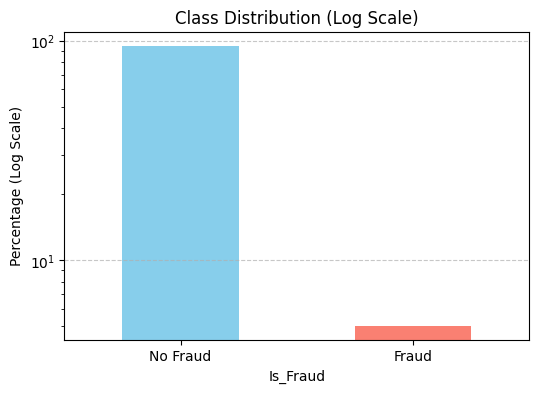

In [49]:
plt.figure(figsize=(6, 4))
class_count.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution (Log Scale)')
plt.ylabel('Percentage (Log Scale)')
plt.xticks(ticks=[0, 1], labels=['No Fraud', 'Fraud'], rotation=0)
plt.yscale('log')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [50]:
value_count = df['Is_Fraud'].value_counts()
fig = px.pie(
    names=['No Fraud', 'Fraud'],
    values=value_count,
    title="Class Distribution",
    color=['No Fraud', 'Fraud'],
    color_discrete_map={'No Fraud': 'skyblue', 'Fraud': 'salmon'}
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# 4. **Transaction Amount Distribution by Fraud**

In [56]:
fig2 = px.box(
    df,
    x="Is_Fraud",
    y="Transaction_Amount",
    color="Is_Fraud",
    title="Transaction Amount Distribution by Fraud",
    color_discrete_map={0:"blue",1:"red"}
)
fig2.show()


#5. **Fraud Count by Transaction Type**

In [57]:
fig3 = px.bar(
    df.groupby(["Transaction_Type","Is_Fraud"]).size().reset_index(name="Count"),
    x="Transaction_Type",
    y="Count",
    color="Is_Fraud",
    barmode="group",
    title="Fraud by Transaction Type"
)
fig3.show()


# 6. **Fraud by Device Type (Bar Chart)**

In [58]:
fig4 = px.bar(
    df.groupby(["Device_Type","Is_Fraud"]).size().reset_index(name="Count"),
    x="Device_Type",
    y="Count",
    color="Is_Fraud",
    barmode="group",
    title="Fraud by Device Type"
)
fig4.show()


#7. **Transaction Amount vs Account Balance**

In [59]:
fig5 = px.scatter(
    df,
    x="Account_Balance",
    y="Transaction_Amount",
    color="Is_Fraud",
    title="Transaction Amount vs Account Balance",
    hover_data=["Customer_ID","Merchant_Category"]
)
fig5.show()


Output hidden; open in https://colab.research.google.com to view.

#8. **Fraud by State (Geo Heatmap / Choropleth)**

In [60]:
fig6 = px.histogram(
    df,
    x="State",
    color="Is_Fraud",
    barmode="group",
    title="Fraud by State"
)
fig6.show()


Output hidden; open in https://colab.research.google.com to view.

#9. **Fraud by Transaction Time**

In [81]:
# Map numeric fraud labels to strings for clarity
df["Fraud_Label"] = df["Is_Fraud"].map({0: "Non-Fraud", 1: "Fraud"})

fig7 = px.histogram(
    df,
    x="Hour",
    color="Fraud_Label",
    barmode="stack",  # stack makes it easier to read
    nbins=24,
    title="Fraud Transactions by Hour of Day",
    color_discrete_map={"Non-Fraud": "skyblue", "Fraud": "red"},
    labels={"Hour": "Transaction Hour", "Fraud_Label": "Transaction Type"},
    text_auto=True
)
fig7.update_layout(
    xaxis=dict(tickmode='linear', dtick=1),  # show each hour 0-23
    yaxis_title="Number of Transactions",
    bargap=0.1
)

fig7.show()

#10. **Fraud by Merchant Category**

In [74]:
# Prepare data
merchant_df = df.groupby(["Merchant_Category","Is_Fraud"]).size().reset_index(name="Count")
merchant_df["Fraud_Label"] = merchant_df["Is_Fraud"].map({0: "Non-Fraud", 1: "Fraud"})

# Convert to percentage
merchant_total = merchant_df.groupby("Merchant_Category")["Count"].transform("sum")
merchant_df["Percentage"] = (merchant_df["Count"] / merchant_total * 100).round(2)

# Plot
fig8 = px.bar(
    merchant_df,
    x="Merchant_Category",
    y="Percentage",
    color="Fraud_Label",
    barmode="stack",
    title="Fraud Percentage by Merchant Category",
    text="Percentage",
    color_discrete_map={"Non-Fraud": "green", "Fraud": "red"}  # custom colors
)

fig8.update_traces(texttemplate='%{text}%', textposition="inside")
fig8.update_layout(xaxis={'categoryorder':'total ascending'})  # sort by total ascending
fig8.show()



In [77]:
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email,Hour
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com,16
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com,17
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com,3
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com,12
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com,18


#11. **Transaction Amount Distribution: Fraud vs Non-Fraud**

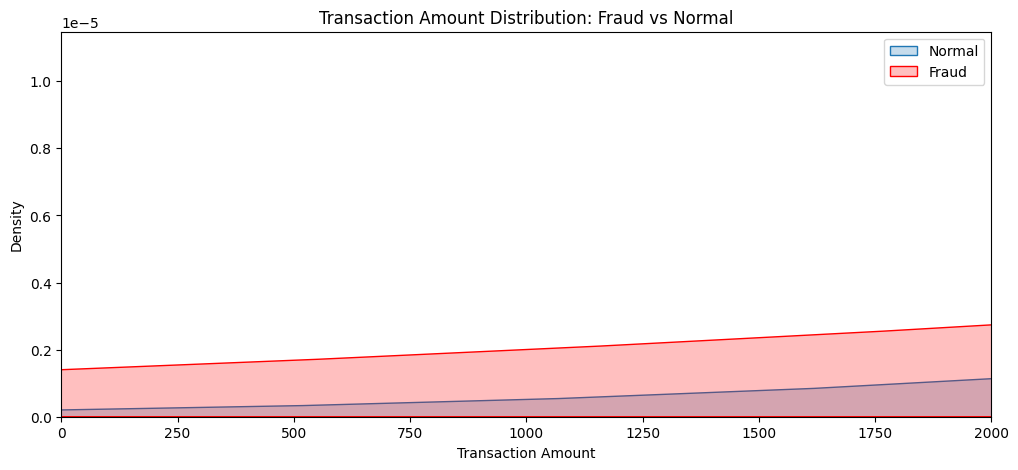

In [83]:
fraud = df[df['Is_Fraud'] == 1]
normal = df[df['Is_Fraud'] == 0]

plt.figure(figsize=(12,5))
sns.kdeplot(normal['Account_Balance'], label='Normal', fill=True)
sns.kdeplot(fraud['Account_Balance'], label='Fraud', fill=True, color='red')
plt.title("Transaction Amount Distribution: Fraud vs Normal")
plt.xlabel("Transaction Amount")
plt.xlim(0, 2000)
plt.legend()
plt.show()


#12. **Fraud vs Normal - Transaction Time**

In [90]:
# Map numeric fraud labels to strings
df["Hour"] = pd.to_datetime(df["Transaction_Time"], errors="coerce").dt.hour

fig = px.histogram(
    df,
    x="Hour",
    color="Fraud_Label",
    barmode="stack",  # stack instead of overlay
    nbins=24,
    color_discrete_map={"Non-Fraud": "#FFA500", "Fraud": "#008080"},
    title="Transaction Time Distribution: Fraud vs Non-Fraud",
    labels={"Hour": "Transaction Hour", "Fraud_Label": "Transaction Type"},
    text_auto=True
)

fig.update_layout(
    xaxis=dict(tickmode='linear', dtick=1),
    yaxis_title="Number of Transactions"
)
fig.show()


 # 13. **Boxplot of Transaction Amount by Class**

In [91]:
# Boxplot for Transaction Amount
fig = px.box(
    df,
    x="Fraud_Label",
    y="Transaction_Amount",
    color="Fraud_Label",
    color_discrete_map={"Non-Fraud": "#008080", "Fraud": "#FFA500"},  # complementary colors
    title="Transaction Amount Distribution: Fraud vs Non-Fraud",
    labels={"Fraud_Label": "Transaction Type", "Transaction_Amount": "Amount"}
)

fig.update_layout(showlegend=False)
fig.show()

Output hidden; open in https://colab.research.google.com to view.